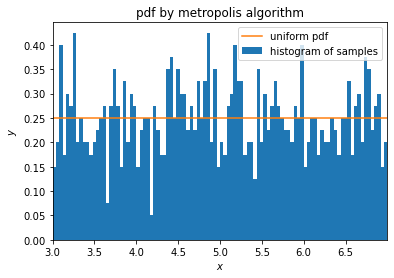

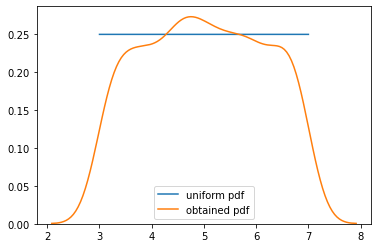

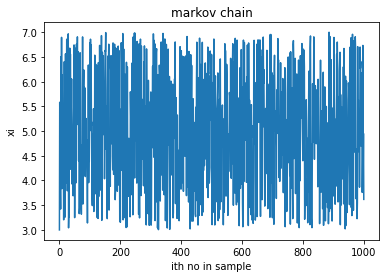

In [9]:

#Q9
from scipy.stats import t
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  #for comparing with uniform distribution
from scipy.stats import uniform
N=1000
def pdf_u(x):
    return uniform.pdf(x,3,4)

def Metropolis(p, z0, sigma, n_samples, burn_in, m):
    sample_list = [z0]
    _ = p(z0) 
    z = z0
    n_sampled = 0

    while len(sample_list[::m]) < n_samples:
        cand = np.random.normal(loc=z, scale=sigma)
        u = np.random.rand()
        try:
            prob = min(1, p(cand) / p(z))
        except (OverflowError, ValueError) as error:
            continue
        n_sampled += 1

        if prob > u:
            z = cand  

        if n_sampled > burn_in:
            sample_list.append(z)

    return np.array(sample_list)[::m]

uniform37 = Metropolis(pdf_u, 3, 1, N, N, m=100)
plt.hist(uniform37, density=True, bins=100, label='histogram of samples')
x = np.linspace(min(uniform37), max(uniform37), 100)
plt.plot(x, pdf_u(x), label='uniform pdf')
plt.xlim(min(uniform37), max(uniform37))
plt.title("pdf by metropolis algorithm")
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.legend()
plt.show()

size = N
x = np.arange(3,7, 1/size)
y = uniform.pdf(x ,3,4)
plt.plot(x,y,label='uniform pdf')
sns.kdeplot(uniform37,label='obtained pdf')
plt.show()

plt.plot(uniform37)
plt.title("markov chain")
plt.xlabel('ith no in sample')
plt.ylabel('xi')
plt.show()


